<a href="https://colab.research.google.com/github/hanisrafiqah/Bio_Modelling_Simulation/blob/main/Heart_Disease_Exercise04012024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
# Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount("/content/gdrive")

# Set the data path for dataset and model location
dataset_dir = "/content/gdrive/My Drive/Notes for Simulation & Modeling Class/[Work] Deep Learning Hands-on/Dataset/Heart Disease/"
model_loc = "/content/gdrive/My Drive/Notes for Simulation & Modeling Class/[Work] Deep Learning Hands-on/Dataset/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Mounted at /content/gdrive
['heart.csv']


In [ ]:
# Exploratory data analysis (EDA) steps to analyze and investigate datasets.

data.head() # display first 5 row data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# This code converts specific columns in the DataFrame 'data' to the data type 'object' for each item in the list 'catagorialList'.
# Converting the data type to 'object' may be necessary to treat certain columns as categorical variables, enabling easier manipulation,
# analysis, and interpretation of the data.
catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

In [ ]:
# #create more data by categorical variable into indicator variables

data = pd.get_dummies(data, drop_first=True)

<ipython-input-5-56cfb03b5c08>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-5-56cfb03b5c08>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-5-56cfb03b5c08>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-5-56cfb03b5c08>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-5-56cfb03b5c08>:3: FutureWarning: In a future version, the In

In [ ]:
data.head() # display first 5 row data

,age,trestbps,chol,thalach,oldpeak,slope,target,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,2,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,2,1,1,1,0,...,1,0,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,2,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [ ]:
y = data['target'].values #take target value
y = y.reshape(y.shape[0],1) #reshape y array into 1 dimension
x = data.drop(['target'],axis=1)#drop 'target' in x data
y.shape

(303, 1)

In [ ]:
y.size

303

In [ ]:
# Demonstration on the normalization code on the simple dataset

# Create a simple dataset
data = pd.DataFrame({'A': [10, 20, 30], 'B': [100, 200, 300], 'C': [1000, 2000, 3000]})
print('Original dataset:')
print(data)

# Normalize data (range 0 - 1)
minx = np.min(data)
maxx = np.max(data)
data_norm = (data - minx) / (maxx - minx)
print('\nNormalized dataset:')
print(data_norm)

Original dataset:
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000

Normalized dataset:
     A    B    C
0  0.0  0.0  0.0
1  0.5  0.5  0.5
2  1.0  1.0  1.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:

#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Split dataset into train and test. (train 70%, val 20% and test 10%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(217, 21)
(55, 21)
(31, 21)


In [ ]:
y.size

303

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#model.compile(loss='mse', optimizer='adam', metrics=['acc'])
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

In [ ]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
14/14 [==============================] - 1s 22ms/step - loss: 0.2489 - acc: 0.5438 - val_loss: 0.2475 - val_acc: 0.5455
Epoch 2/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2470 - acc: 0.5438 - val_loss: 0.2449 - val_acc: 0.5455
Epoch 3/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2429 - acc: 0.5438 - val_loss: 0.2378 - val_acc: 0.5455
Epoch 4/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2339 - acc: 0.5576 - val_loss: 0.2235 - val_acc: 0.6545
Epoch 5/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2186 - acc: 0.7926 - val_loss: 0.2028 - val_acc: 0.8545
Epoch 6/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.1983 - acc: 0.8433 - val_loss: 0.1766 - val_acc: 0.8727
Epoch 7/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.1774 - acc: 0.8387 - val_loss: 0.1600 - val_acc: 0.8909
Epoch 8/1000
14/14 [==============================] - 0s 5ms/step - loss: 0

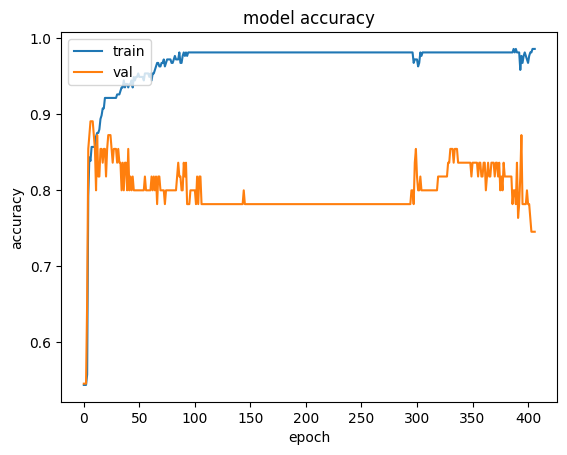

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

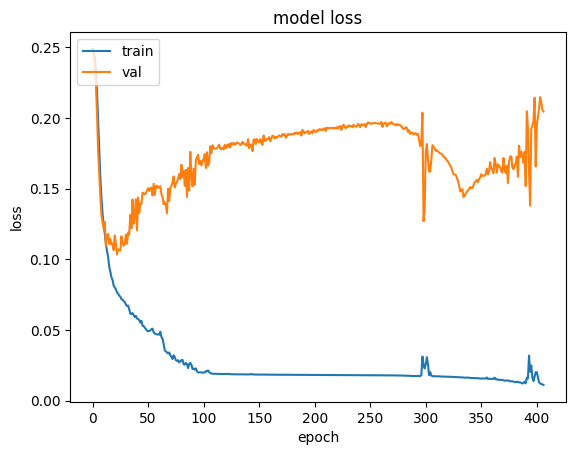

In [ ]:
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('Loss.png',dpi=100) #to save the image
plt.show()

In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

1/1 [==============================] - 0s 34ms/step - loss: 0.2514 - acc: 0.7419

acc: 74.19%
loss: 0.25


In [ ]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

1/1 [==============================] - 0s 103ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result

In [ ]:
y.size

31

In [ ]:
# y_pred.size

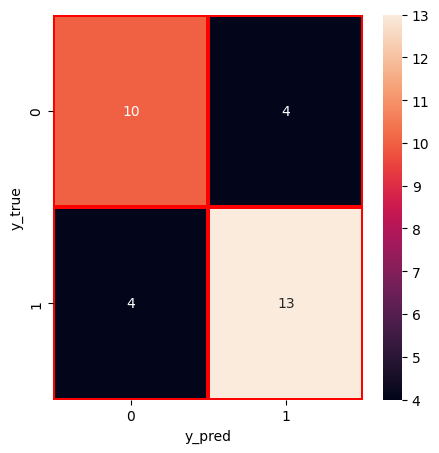


              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.76      0.76      0.76        17

    accuracy                           0.74        31
   macro avg       0.74      0.74      0.74        31
weighted avg       0.74      0.74      0.74        31



In [ ]:
y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

In [ ]:
# type(y_pred)
y_pred.size

31

In [ ]:
y_true.size

31